In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.ndim

2

In [11]:
df.columns=df.columns.str.lower()

In [12]:
df['car_name'].describe()

count      299
unique      98
top       city
freq        26
Name: car_name, dtype: object

In [13]:
from pandas_profiling import ProfileReport

In [14]:
profile=ProfileReport(df,explorative=True)

In [15]:
df.groupby('car_name')['selling_price'].mean().sort_values(ascending=False).head(10)

car_name
land cruiser     35.000000
fortuner         18.254000
innova           12.777778
creta            11.800000
elantra          11.600000
vitara brezza     9.250000
ciaz              7.472222
city              7.419231
corolla altis     7.183125
ertiga            6.580000
Name: selling_price, dtype: float64

In [16]:
df.groupby('car_name')['present_price'].mean().sort_values(ascending=False).head(10)

car_name
land cruiser     92.600000
fortuner         30.745000
camry            23.730000
innova           17.846667
corolla altis    17.582500
elantra          14.790000
creta            13.600000
corolla          12.350000
city             11.791923
vitara brezza     9.830000
Name: present_price, dtype: float64

<Axes: xlabel='car_name'>

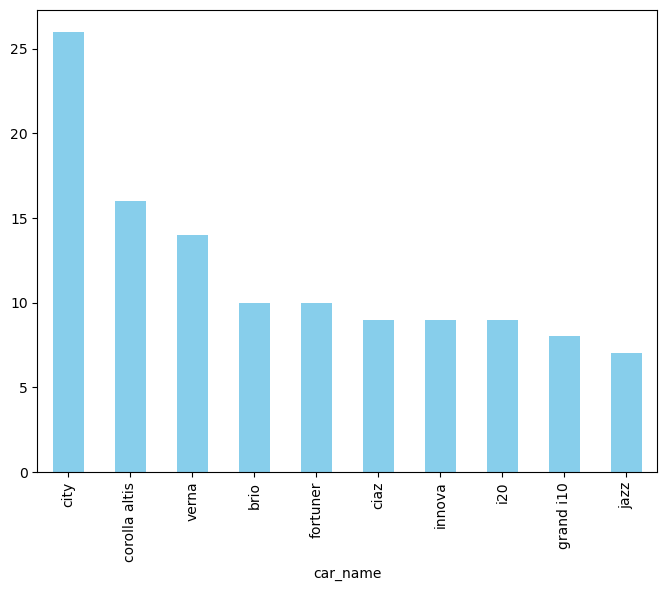

In [17]:
%matplotlib inline

df['car_name'].value_counts().head(10).plot(kind='bar', color='skyblue', figsize=(8, 6))


<Axes: xlabel='selling_price', ylabel='Density'>

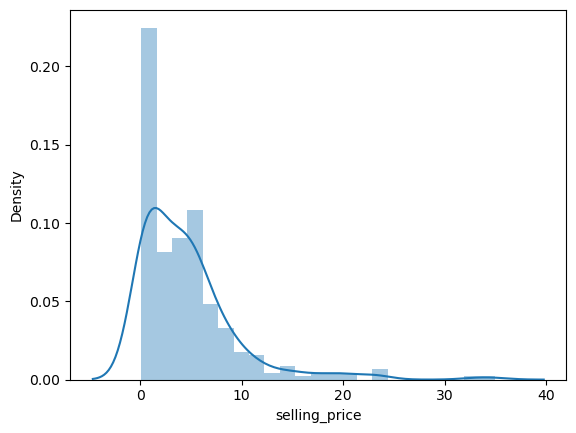

In [18]:
sns.distplot(df['selling_price'])

<Axes: xlabel='present_price', ylabel='Density'>

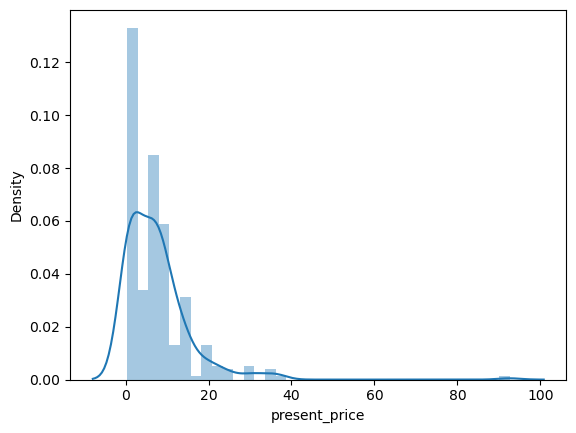

In [19]:
sns.distplot(df['present_price'])

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xg
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [21]:
x=df.drop(['selling_price'],axis=1)
y=df['selling_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'driven_kms',
       'fuel_type', 'selling_type', 'transmission', 'owner'],
      dtype='object')

In [23]:
df.dtypes

car_name          object
year               int64
selling_price    float64
present_price    float64
driven_kms         int64
fuel_type         object
selling_type      object
transmission      object
owner              int64
dtype: object

In [24]:
stp1=ColumnTransformer(
transformers=[
    ('t1',StandardScaler(),['year','present_price','driven_kms']),
    ('t2',OneHotEncoder(handle_unknown='ignore'),['car_name','fuel_type','selling_type','transmission'])
],    
remainder='passthrough'
)

In [25]:
stp2=xg.XGBRegressor(
n_estimators=110,
learning_rate=0.2,
max_depth=3,
min_child_weight=1,
gamma=0.01,
subsample=0.8,
colsample_bytree=1.0,
objective='reg:squarederror',
nthread=4,
seed=20,
reg_alpha=0.19,
reg_lambda=0.2
)

In [26]:
model=Pipeline(
steps=[
    ('data processing',stp1),
    ('model',stp2)
]
)

In [27]:
x_train.columns

Index(['car_name', 'year', 'present_price', 'driven_kms', 'fuel_type',
       'selling_type', 'transmission', 'owner'],
      dtype='object')

In [28]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}


In [29]:
model.fit(x_train,y_train)

Pipeline(steps=[('data processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', StandardScaler(),
                                                  ['year', 'present_price',
                                                   'driven_kms']),
                                                 ('t2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['car_name', 'fuel_type',
                                                   'selling_type',
                                                   'transmission'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsa...
                              feature_types=None, gamma=0.01, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=110,
                              n_jobs=None, nthread=4, num_parallel_tree=None, ...))])

In [30]:
y_pred=model.predict(x_test)
acc=r2_score(y_test,y_pred)
print(acc)

0.8603149245777374


In [31]:
cv=cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
cv_score=cv.mean()
print(cv_score)

0.8616026654439708
